# 영상입력 이진분류 컨볼루션 신경망
* 영상을 입력해서 이진 분류할 수 있는 모델 생성 
* MNIST를 이용하여 홀수 / 짝수 구분 

### 사용할 패키지 선언 

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import utils

* 이미지 크기 

In [2]:
width = 28
height = 28

### 1. 데이터셋 생성하기
- 초기 라벨값은 0에서 9까지 정수로 지정
- 데이터 정규화를 위해서 255.0으로 나눔

#### 훈련셋과 시험셋 불러오기
- 컨볼루션 신경망 모델에 입력하기 위해 데이터셋 생성
- 샘플수, 너비, 높이, 채널수로 총 4차원 배열로 구성

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

#### 훈련셋과 검증셋 분리

In [4]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#### 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환

In [5]:
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

### 2. 모델 구성하기(CNN 적용)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

### 3. 모델 학습과정 설정하기

In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4.모델 학습시키기

In [8]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 135us/sample - loss: 0.3292 - accuracy: 0.8574 - val_loss: 0.1549 - val_accuracy: 0.9463
Epoch 2/30
50000/50000 [==============================] - 5s 93us/sample - loss: 0.1340 - accuracy: 0.9510 - val_loss: 0.0883 - val_accuracy: 0.9698
Epoch 3/30
50000/50000 [==============================] - 5s 96us/sample - loss: 0.0879 - accuracy: 0.9686 - val_loss: 0.0679 - val_accuracy: 0.9756
Epoch 4/30
50000/50000 [==============================] - 5s 96us/sample - loss: 0.0689 - accuracy: 0.9753 - val_loss: 0.0614 - val_accuracy: 0.9797
Epoch 5/30
50000/50000 [==============================] - 5s 96us/sample - loss: 0.0589 - accuracy: 0.9799 - val_loss: 0.0641 - val_accuracy: 0.9774
Epoch 6/30
50000/50000 [==============================] - 5s 96us/sample - loss: 0.0512 - accuracy: 0.9821 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 7/30
50000/50000 [==============================]

### 5. 학습과정 살펴보기

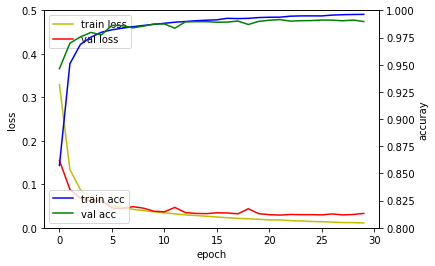

In [9]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()                                        # loss_ax와 함께 acc_ax 그래프 같이 표현 

# loss 에 대한 그래프 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')     # 노란색 선 
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')   # 빨간색 선 
loss_ax.set_ylim([0.0, 0.5])                                    # Y축 값 

# acc 에 대한 그래프 
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')   # 파란색 선 
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc') # 녹색 선 
acc_ax.set_ylim([0.8, 1.0])

# x, y 축에 라벨 붙이기 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

# 범례 보이기 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [10]:
loss, metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ', loss)
print('metrics : ', metrics)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.0219 - accuracy: 0.9931
loss :  0.021896534882100242
metrics :  0.9931


### 7. 모델 사용하기

In [11]:
yhat_test = model.predict(x_test, batch_size=32)

### 데이터 셋 일부 확인하기 

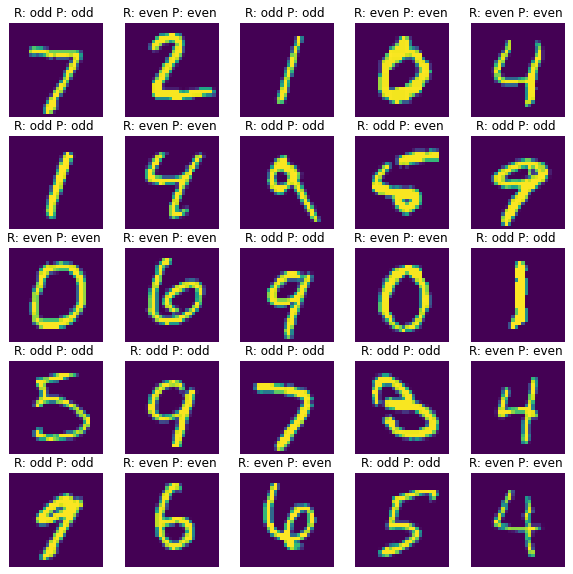

In [12]:
%matplotlib inline
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    # 실제 값 
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    # 예측 값 
    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '  
        
    sub_plt.set_title(sub_plt_title)
    
plt.show()